In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

url = 'https://raw.githubusercontent.com/krishnaik06/AQI-Project/master/Data/Real-Data/Real_Combine.csv'
df = pd.read_csv(url, error_bad_lines=False)
df=df.dropna()

In [3]:

X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features


# Splitting into train and test

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Fitting the Regression model

In [5]:

import xgboost as xgb
xgb_model=xgb.XGBRegressor()

# Grid Search CV

In [42]:
Grid_search = GridSearchCV(xgb_model,
                   {'max_depth': [ 4,6,8],
                    'n_estimators': [30, 25, 35]}, verbose=1)

# Fitting the model
Grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_est...
                                    num_parallel_tree=None,
                                    objective='reg:squarederror',
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                   

# Printing the best performed parameters

In [43]:
print('Thsese are the best performed parameters')
print(Grid_search.best_params_)

Thsese are the best performed parameters
{'max_depth': 8, 'n_estimators': 25}


# Fitting data with best parameters

In [44]:
# Fitting the data with best performed XGboost 

model=xgb.XGBRegressor(max_depth=8,n_estimators=25)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=25, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

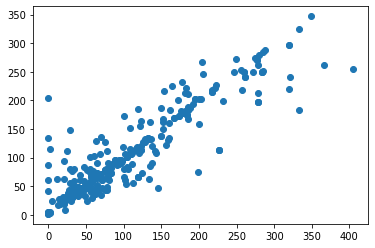

In [45]:
# Predicting the test

prediction=model.predict(X_test)

plt.scatter(y_test,prediction)

In [46]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('This is the lowest error in all of our models')

MSE: 1255.3162193265296
This is the lowest error in all of our models


# Pickling The current Model

In [47]:
import pickle
# open a file, where you ant to store the data
file = open("XG_boost_CV_search_model.pkl", 'wb')

# dump information to that file
pickle.dump(model, file)

#closing the file
file.close()

In [48]:
# Loading Pickled file
model2 = pickle.load(open("XG_boost_CV_search_model.pkl", "rb"))

open("XG_boost_CV_search_model.pkl", "rb").close

<function BufferedReader.close>

In [49]:
print(model2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=25, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
